In [58]:
import pandas as pd
import seaborn as sns
import numpy as np

In [105]:
df = pd.read_csv("../data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [107]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


1. Проверить на NaN
2. На глаз определить распределения признаков

In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

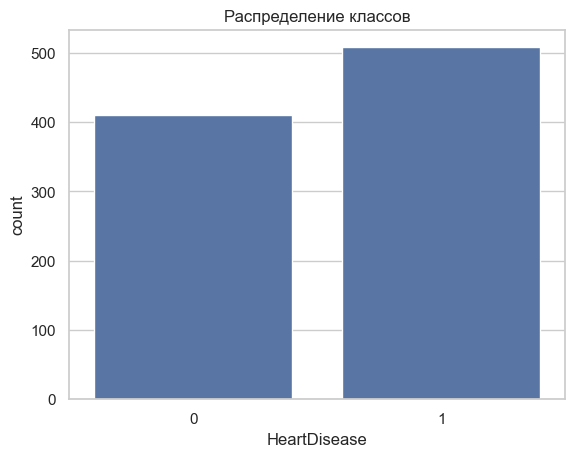

In [44]:
# распределения классов
sns.countplot(x="HeartDisease", data=df)
plt.title("Распределение классов")
plt.show()

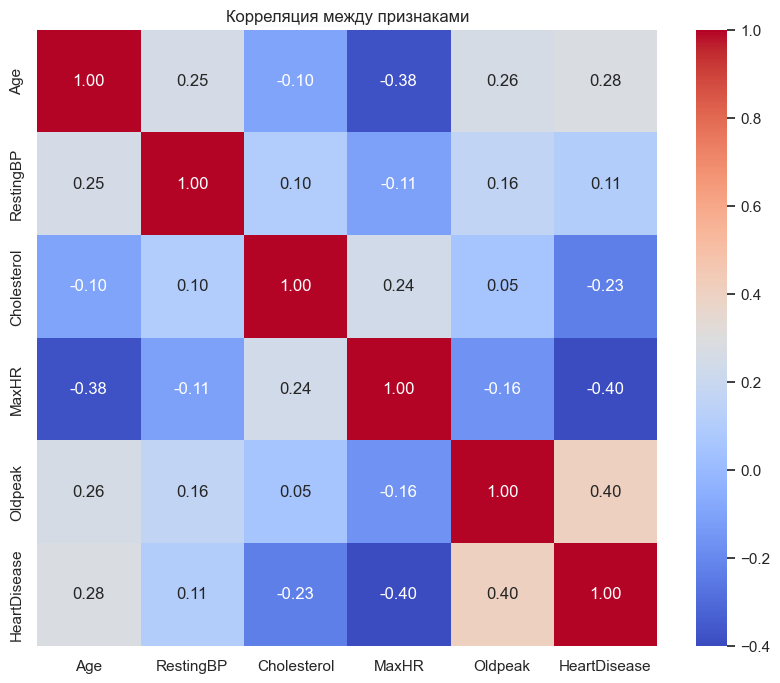

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляция между признаками")
plt.show()

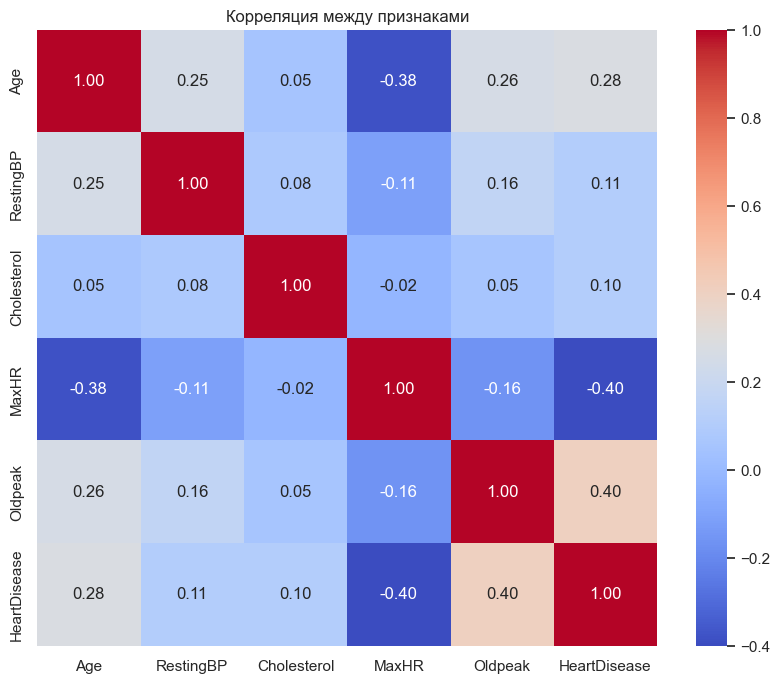

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляция между признаками")
plt.show()

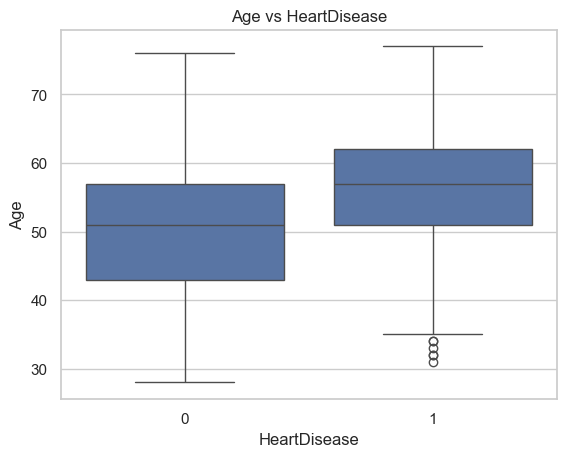

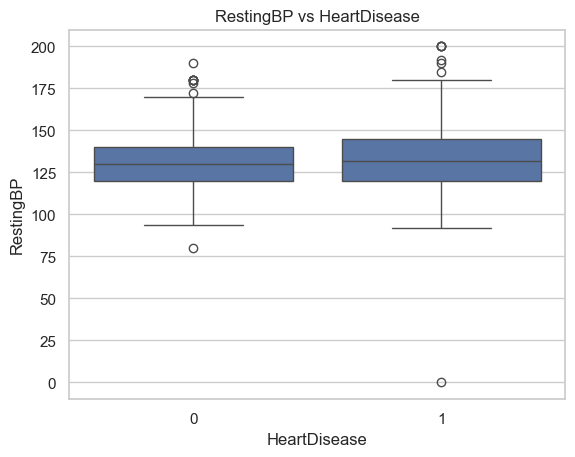

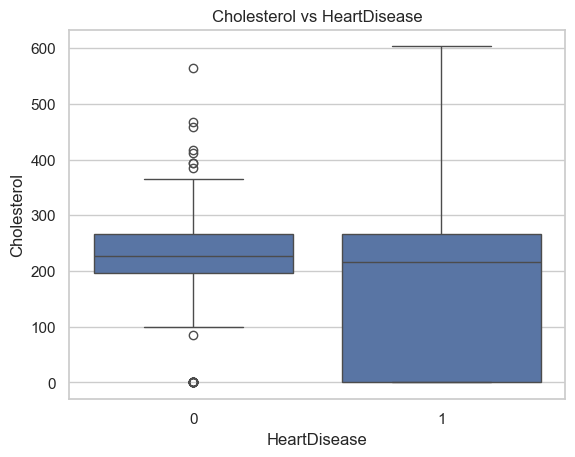

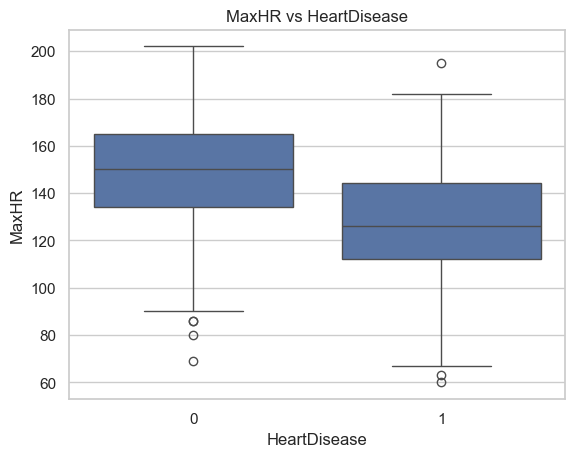

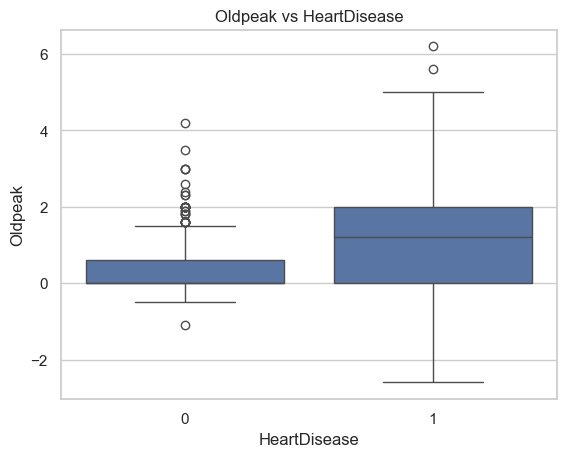

In [54]:
for col in ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]:
    sns.boxplot(x="HeartDisease", y=col, data=df)
    plt.title(f"{col} vs HeartDisease")
    plt.show()

In [56]:
# проверим сколько нулей
df[df["Cholesterol"] == 0].shape

(172, 12)

In [59]:
# заменим 0 на NaN
df["Cholesterol"] = df["Cholesterol"].replace(0, np.nan)

# Заполним медианой по группам
df["Cholesterol"] = df.groupby("HeartDisease")["Cholesterol"].transform(
    lambda x: x.fillna(x.median())
)

<Axes: xlabel='Age', ylabel='Count'>

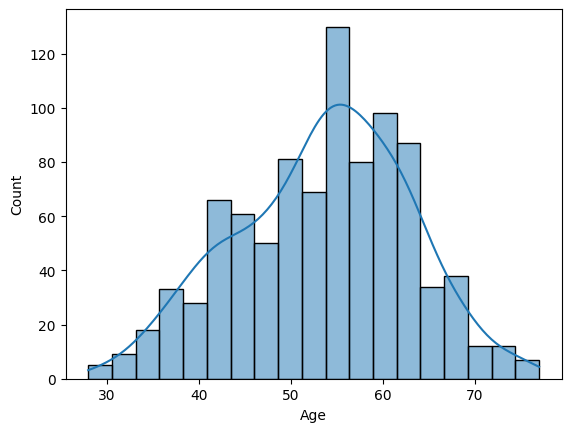

In [9]:
sns.histplot(df['Age'], kde=True)

In [10]:
print(df['Age'].skew())

-0.19593302867569365


0.1798393100516288


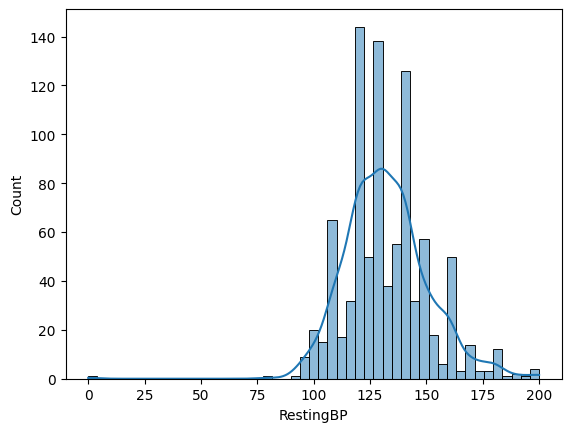

In [11]:
sns.histplot(df['RestingBP'], kde=True)
print(df['RestingBP'].skew())

-0.6100864307268192


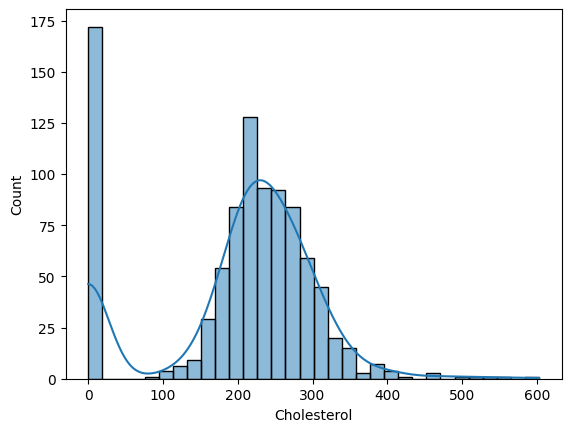

In [12]:
sns.histplot(df['Cholesterol'], kde=True)
print(df['Cholesterol'].skew())

1.3735239782979645


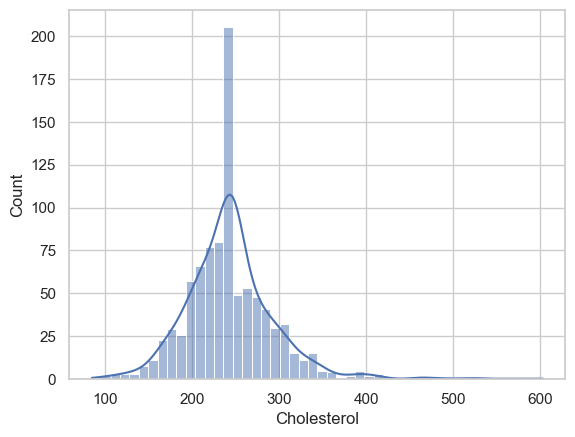

In [60]:
sns.histplot(df['Cholesterol'], kde=True)
print(df['Cholesterol'].skew())

1.2644841750727027


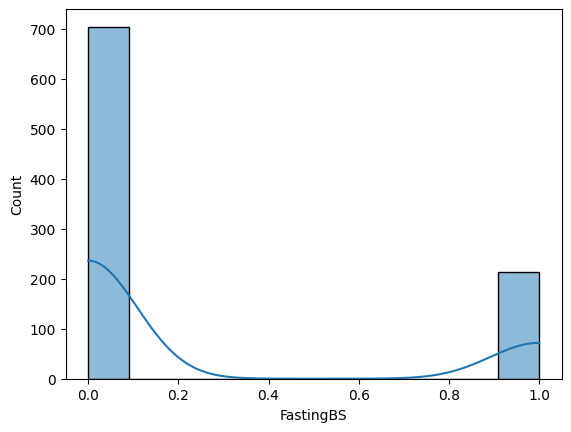

In [13]:
sns.histplot(df['FastingBS'], kde=True)
print(df['FastingBS'].skew())

-0.14435941846180994


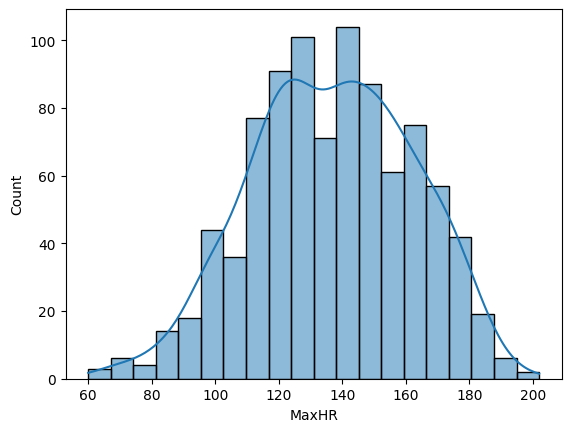

In [14]:
sns.histplot(df['MaxHR'], kde=True)
print(df['MaxHR'].skew())

1.0228720218107528


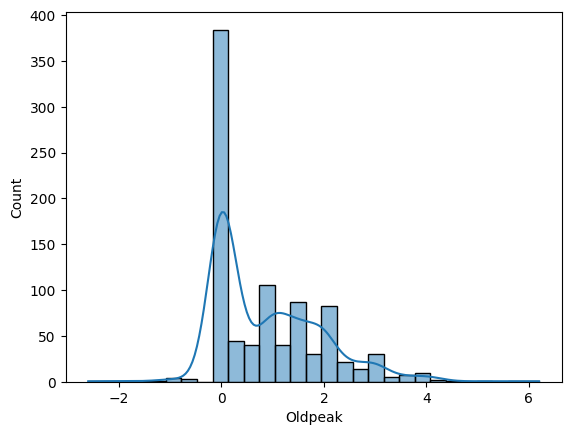

In [15]:
sns.histplot(df['Oldpeak'], kde=True)
print(df['Oldpeak'].skew())

In [22]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
print(cat_cols)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [40]:
cat_cols = df.select_dtypes(include="object").columns.tolist() + ["FastingBS"]
num_cols = [c for c in df.columns if c not in cat_cols + ["HeartDisease"]]

In [41]:
cat_cols

['Sex',
 'ChestPainType',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'FastingBS']

In [42]:
num_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

logit_pipe = Pipeline([
    ("preprocess", preprocess),
    ("clf", LogisticRegression(max_iter=1000))
])

logit_pipe.fit(X_train, y_train)
y_pred = logit_pipe.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.875


In [30]:
from sklearn.metrics import (
precision_score, recall_score, f1_score,
confusion_matrix, ConfusionMatrixDisplay,
roc_auc_score, classification_report
)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85        82
           1       0.86      0.93      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



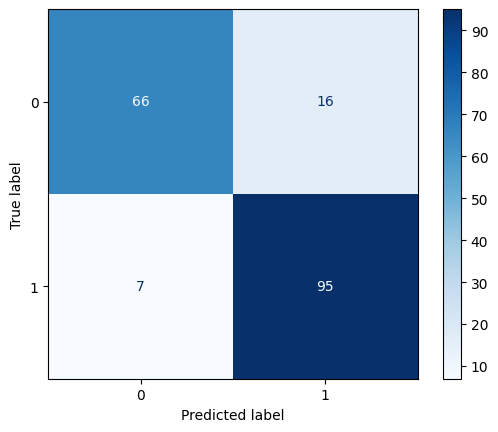

In [32]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

Заметил, что заполнение медианой сильно меняет корреляцию с признаком. Буду делать заполнение через регрессию по строкам без пропусков.

In [85]:
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error

In [63]:
df_real = pd.read_csv("../data/heart.csv")

In [64]:
# заменим все Cholesterol == 0 на Nan
df_real["Cholesterol"] = df_real["Cholesterol"].replace(0, np.nan)

In [66]:
# удалим строки с пропусками
df_full = df_real.dropna(subset=["Cholesterol"]).copy()

In [68]:
# маска для искусственного пропуска
np.random.seed(42)
mask = np.random.rand(len(df_full)) < 0.2
true_chol = df_full.loc[mask, "Cholesterol"]
df_with_missing = df_full.copy()
df_with_missing.loc[mask, "Cholesterol"] = np.nan

In [69]:
# используем только числовые признаки
df_numeric = df_with_missing.select_dtypes(include=[np.number])

In [103]:
# сравнение моделей
models = {
    "BayesianRidge": BayesianRidge(),
    # "DecisionTree": DecisionTreeRegressor(random_state=0),
    "RandomForest": RandomForestRegressor(n_estimators=50, random_state=0),
    "RandomForest40": RandomForestRegressor(n_estimators=40, random_state=0),
    "RandomForest60": RandomForestRegressor(n_estimators=60, random_state=0),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "KNN4": KNeighborsRegressor(n_neighbors=4),
    "KNN6": KNeighborsRegressor(n_neighbors=6)
}

results_real = {}

for name, model in models.items():
    imputer = IterativeImputer(estimator=model, random_state=0, max_iter=20)
    imputed = imputer.fit_transform(df_numeric)
    chol_imputed = imputed[mask, df_numeric.columns.get_loc("Cholesterol")]
    mse = mean_squared_error(true_chol, chol_imputed)
    results_real[name] = mse

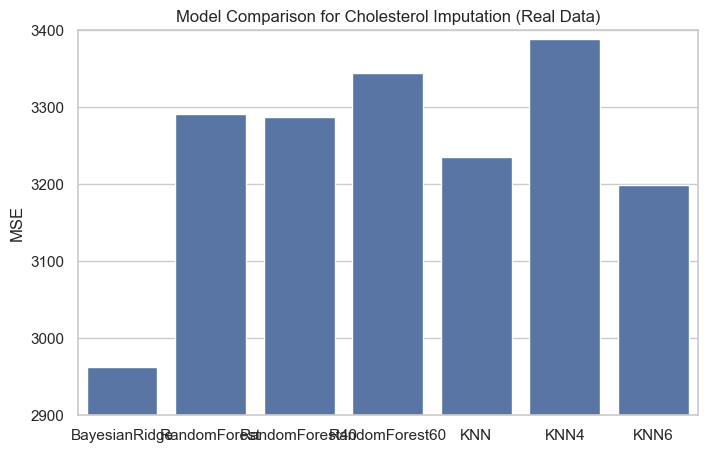

In [100]:
# визуализация
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results_real.keys()), y=list(results_real.values()))
plt.ylabel("MSE")
plt.title("Model Comparison for Cholesterol Imputation (Real Data)")
plt.ylim(2900, 3400)
plt.show()

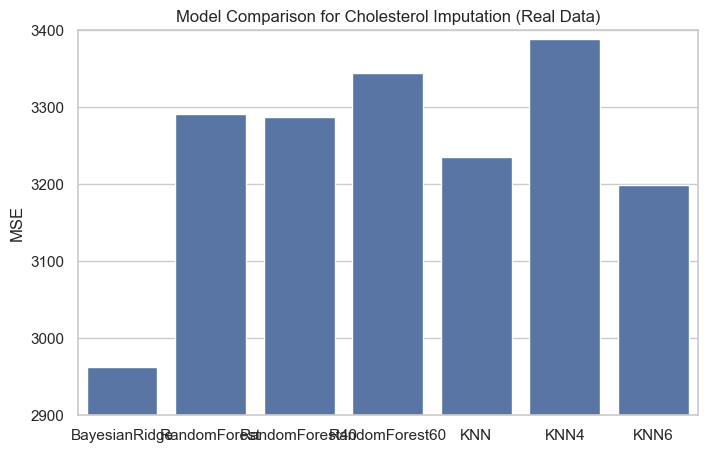

In [104]:
# визуализация
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results_real.keys()), y=list(results_real.values()))
plt.ylabel("MSE")
plt.title("Model Comparison for Cholesterol Imputation (Real Data)")
plt.ylim(2900, 3400)
plt.show()

Видим, что BayesianRidge имеет самую низкую ошибку.

In [111]:
df_fixed = df_real.copy()
df_fixed["Cholesterol"] = df_fixed["Cholesterol"].replace(0, np.nan)

# Берем только числовые признаки
numeric_cols = df_fixed.select_dtypes(include=[np.number]).columns
df_numeric = df_fixed[numeric_cols]

# используем BayesianRidge
imputer = IterativeImputer(estimator=BayesianRidge(), random_state=0, max_iter=10)
imputed_array = imputer.fit_transform(df_numeric)

# возвращаем данные в датафрейм
df_numeric_imputed = pd.DataFrame(imputed_array, columns=numeric_cols)

# обновляем Cholesterol в исходном датасете
df_fixed["Cholesterol"] = df_numeric_imputed["Cholesterol"]

Проверим форму распределения Cholesterol и корреляцию.

1.371289730050704


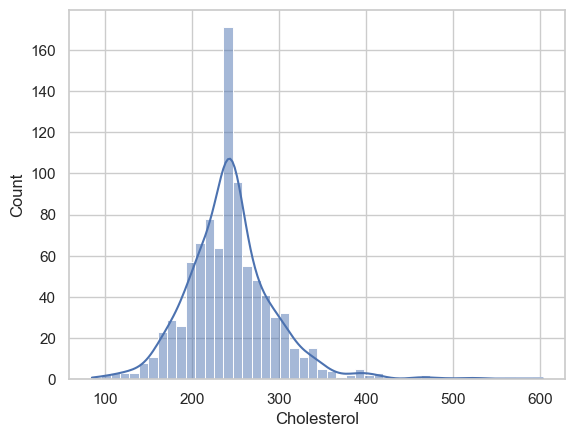

In [112]:
sns.histplot(df_fixed['Cholesterol'], kde=True)
print(df_fixed['Cholesterol'].skew())

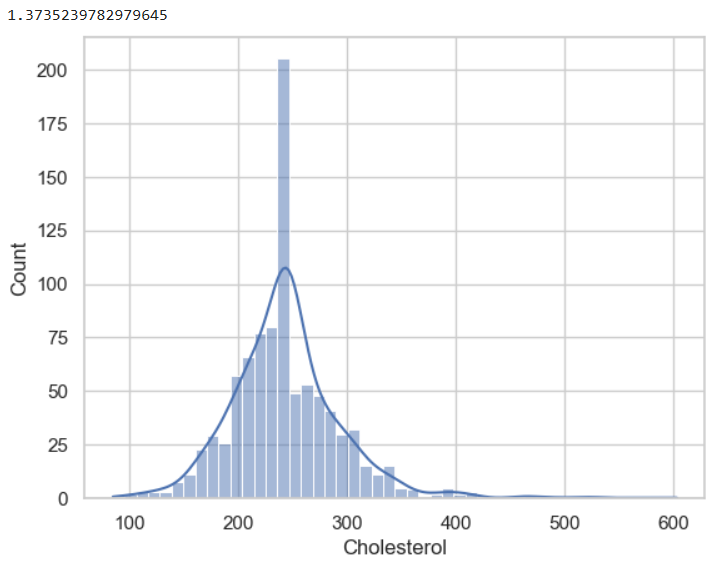

-0.6100864307268192


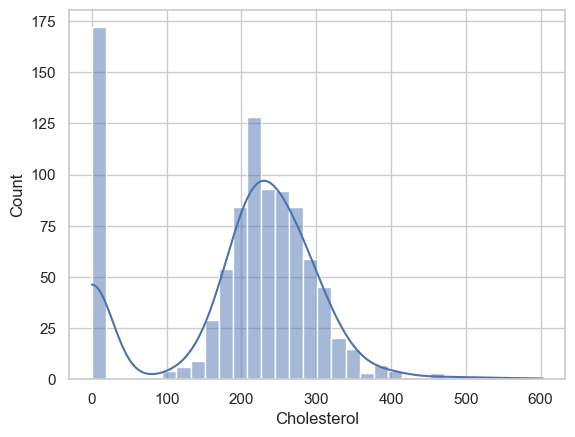

In [113]:
sns.histplot(df['Cholesterol'], kde=True)
print(df['Cholesterol'].skew())